# Figure making notebook

This notebook creates the figures of the paper, using previously trained RNNs.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import seaborn as sns
import svgutils.compose as sc
import IPython.display as ip
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color=sns.color_palette('colorblind'))
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar as mpl_colorbar

import bptt_rnn_mtl as bpm
import plot_routines as pr  # plotting functions & directly related
import plot_routines_mtl as prm
import rot_utilities as ru  # random utilies

%load_ext autoreload
%autoreload 2

prm.set_fontsize(12)
plt.rcParams['axes.linewidth'] = 1.25  # defaul t0.8

cpu


## Figure 1:

First we create the two data panels. The schematics have been made in Inkscape and saved as `.svg`. Then we combine both here.

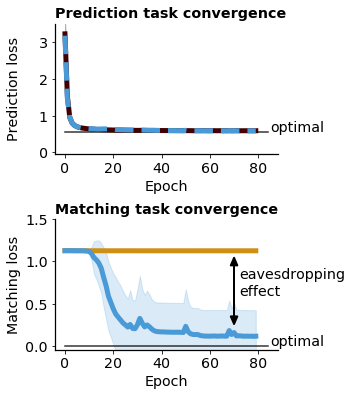

In [3]:
## First we create the two data panels
save_fig = False

prm.set_fontsize(14.3)
fig, ax = plt.subplots(2, 1, figsize=(4, 6), gridspec_kw={'hspace': 0.5})
optimal_pred = -0.25 * (3 * np.log(0.75) + np.log(0.25))
ax[0].plot([0, 84], [optimal_pred, optimal_pred], c='k', alpha=0.8)
prm.plot_effect_eavesdropping_learning(task='dmc', ratio_exp_str='7525', nature_stim='onehot',
                                       sparsity_str='1e-03', ax=ax[0], plot_legend=False,
                                       plot_std=True, plot_indiv=False, plot_spec=False,
                                       plot_title=False)
ax[0].text(s='optimal', x=85, y=optimal_pred)
ax[0].set_ylabel('Prediction loss')
ax[0].set_title('Prediction task convergence', fontdict={'weight': 'bold'}, loc='left')
# plt.savefig('figures/fig1_prediction_task.svg', bbox_inches='tight')


optimal_cat = 0
naive_cat = 2 * optimal_pred
ax[1].plot([0, 84], [optimal_cat, optimal_cat], c='k', alpha=0.8)
# ax[1].plot([0, 84], [naive_cat, naive_cat], c='k', alpha=0.8)
prm.plot_effect_eavesdropping_learning(task='dmc', ratio_exp_str='7525', nature_stim='onehot',
                                       sparsity_str='1e-03', ax=ax[1], plot_legend=False,
                                       plot_std=True, plot_indiv=False, plot_pred=False,
                                      plot_title=False)
ax[1].text(s='optimal', x=85, y=optimal_cat)
# ax[1].text(s='naive', x=85, y=naive_cat)
plt.arrow(70, 0.65, 0, 0.4, head_width=3, head_length=0.1, linewidth=1.5, 
          color='k', length_includes_head=True)
plt.arrow(70, 0.65, 0, -0.4, head_width=3, head_length=0.1, linewidth=1.5, 
          color='k', length_includes_head=True)
ax[1].text(s='eavesdropping\neffect', x=72, y=0.6)
ax[1].set_ylabel('Matching loss')
ax[1].set_title('Matching task convergence', fontdict={'weight': 'bold'}, loc='left')

fig.align_ylabels(axs=[ax[0], ax[1]])

if save_fig:
    plt.savefig('figures/fig1_prediction_and_categorisation_task.svg', bbox_inches='tight')

In [ ]:
## Combine:
save_fig = False 

if save_fig:
    sc.Figure('7cm', '4cm',
            sc.Panel(sc.SVG('figures/fig1_prediction_and_categorisation_task.svg').scale(0.28).move(161.3, 40)),
            sc.Panel(sc.SVG('figures/fig1_schematic.svg').scale(1).move(0, 0))
                    ).save('figures/fig1_full_v2.svg')

In [4]:
## Show result:
ip.SVG('figures/fig1_full_v2.svg')

# Figure 2:


In [10]:
prm.set_fontsize(12)

3.814697265625e-06 mtl stl
0.00830841064453125 late s2
0.0001314204445389205 mtl stl
Cutting of DF because of empty rows
Cutting of DF because of empty rows
5.333285565342521 ['dmc'] ['onehot']


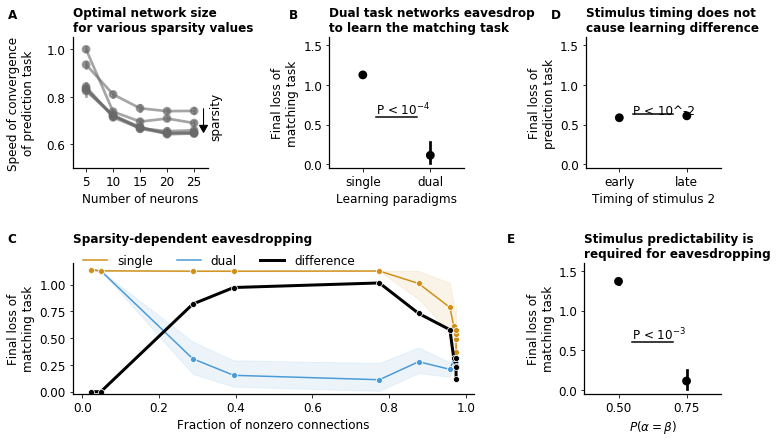

In [11]:
save_fig = False

fig = plt.figure(constrained_layout=False, figsize=(9, 5.5))
gs_top = fig.add_gridspec(ncols=3, nrows=1, bottom=0.62, top=0.95, left=0, right=1, wspace=0.9)
gs_bottom_l = fig.add_gridspec(ncols=1, nrows=1, bottom=0.05, top=0.38, left=0, right=0.62, wspace=0.9)
gs_bottom_r = fig.add_gridspec(ncols=1, nrows=1, bottom=0.05, top=0.38, left=0.79, right=1, wspace=0.9)

ax_top, ax_bottom = {}, {}
for ii in range(3):
    ax_top[ii] = fig.add_subplot(gs_top[ii])
ax_bottom_r = fig.add_subplot(gs_bottom_r[0])
ax_bottom_l = fig.add_subplot(gs_bottom_l[0])
# for ii in range(2):
#     ax_bottom[ii] = fig.add_subplot(gs_bottom[ii])
prm.plot_n_nodes_sweep_multiple(method='integral', ax=ax_top[0])
prm.plot_stl_mtl_comparison(method='final_loss', ax=ax_top[1])
prm.plot_late_s2_comparison(method='final_loss', ax=ax_top[2])
prm.plot_7525_5050_comparison(method='final_loss', ax=ax_bottom_r)

nz_df, nz_array, spars_arr = ru.create_nonzero_mapping_df(type_task='dmc', nature_stim='onehot')
df = prm.plot_learning_efficiency(plot_difference=False, method='final_loss', task_list=['dmc'],
                                  nature_stim_list=['onehot'], ax=ax_bottom_l, indicate_sparsity=False,
                                  new_x_axis_df=nz_df)
df = prm.plot_learning_efficiency(plot_difference=True, method='final_loss', task_list=['dmc'],
                                  nature_stim_list=['onehot'], ax=ax_bottom_l, indicate_sparsity=True,
                                  plot_custom_legend=True, plot_title=True, leg_cols=3,
                                  new_x_axis_df=nz_df, leg_anchor=(0, 1.15))

ax_top[0].text(s='A', x=-2.9, y=1.13, fontdict={'weight': 'bold'})
ax_top[0].text(s='B', x=7.5, y=1.13, fontdict={'weight': 'bold'})
ax_top[0].text(s='D', x=17.2, y=1.13, fontdict={'weight': 'bold'})
ax_top[0].text(s='C', x=-2.9, y=0.19, fontdict={'weight': 'bold'})
ax_top[0].text(s='E', x=15.6, y=0.19, fontdict={'weight': 'bold'})

fig.align_ylabels(axs=[ax_top[0], ax_bottom_l])
fig.align_ylabels(axs=[ax_top[2], ax_bottom_r])

if save_fig:
    plt.savefig('figures/fig2-homework_v2.pdf', bbox_inches='tight')

Cutting of DF because of empty rows
2.090743818886576 ['dmc'] ['onehot']
Cutting of DF because of empty rows
Cutting of DF because of empty rows
5.479614048933612 ['dmc'] ['onehot']
Cutting of DF because of empty rows
Cutting of DF because of empty rows
6.527746847308706 ['dmc'] ['onehot']
Cutting of DF because of empty rows
Cutting of DF because of empty rows
4.6628954802402305 ['dmc'] ['onehot']
Cutting of DF because of empty rows
Cutting of DF because of empty rows
3.533081921709236 ['dmc'] ['onehot']
Cutting of DF because of empty rows
Cutting of DF because of empty rows
2.479279126070439 ['dmc'] ['onehot']
Cutting of DF because of empty rows
Cutting of DF because of empty rows
3.7878386416498095 ['dmc'] ['onehot']
Cutting of DF because of empty rows
Cutting of DF because of empty rows
3.4268721093769425 ['dmc'] ['onehot']
Cutting of DF because of empty rows


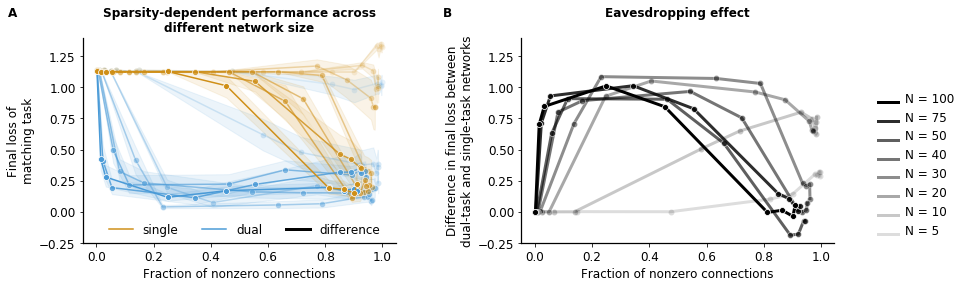

In [22]:
fig = plt.figure(constrained_layout=False, figsize=(12, 3))
gs_plots = fig.add_gridspec(ncols=2, nrows=1, left=0, right=0.87, top=0.95, bottom=0, wspace=0.4)
gs_leg = fig.add_gridspec(ncols=1, nrows=1, left=0.92, right=1, top=1, bottom=0)

save_fig = False
plot_nz_axis = True
bool_diff = False
use_gridsweep = True
ax = {ii: fig.add_subplot(gs_plots[ii]) for ii in range(2)}
ax_leg = fig.add_subplot(gs_leg[0])
n_nodes_list = [5, 10, 20, 30, 40, 50, 75, 100]
for i_node, n_nodes in enumerate(n_nodes_list):
    gridsweep_n_nodes = f'n_nodes_{n_nodes}'
    if plot_nz_axis:
        nz_df, _, __ = ru.create_nonzero_mapping_df(type_task='dmc', nature_stim='onehot', 
                                    use_gridsweep_rnns=use_gridsweep, gridsweep_n_nodes=gridsweep_n_nodes)
    else:
        nz_df = None
    for bool_diff in [True, False]:
        df = prm.plot_learning_efficiency(plot_difference=bool_diff, method='final_loss', 
                                        task_list=['dmc'], nature_stim_list=['onehot'], ax=ax[1 if bool_diff else 0],
                                        plot_custom_legend=np.logical_and(bool_diff == False, i_node == len(n_nodes_list) - 1), 
                                        leg_anchor=(0.05, 0.15), leg_cols=3,
                                        new_x_axis_df=nz_df,
                                        use_gridsweep_rnns=use_gridsweep, gridsweep_n_nodes=gridsweep_n_nodes)

    if use_gridsweep is False:
        break

    ## make legend
    y_pos = 0.04 + (i_node / len(n_nodes_list)) * 0.7
    x_pos = 0

    ax_leg.plot([x_pos, x_pos + 0.3], [y_pos, y_pos], linewidth=3, c='k', 
                alpha=np.power((n_nodes / 100), 0.67))  # same as in prm.plot_learning_efficiency()

    ax_leg.text(s=f'N = {n_nodes}', x=x_pos + 0.4, y=y_pos, ha='left')

for i_plot in range(2):
    ax[i_plot].set_ylim([-0.25, 1.4])

ax[1].set_ylabel('Difference in final loss between\ndual-task and single-task networks')
ax[0].set_title('Sparsity-dependent performance across\ndifferent network size', fontdict={'weight': 'bold'})
ax[1].set_title('Eavesdropping effect\n', fontdict={'weight': 'bold'})
ax[0].text(s='A', x=-0.31, y=1.57, fontdict={'weight': 'bold'})
ax[0].text(s='B', x=1.21, y=1.57, fontdict={'weight': 'bold'})
prm.naked(ax_leg)
ax_leg.set_xlim([0, 1])
ax_leg.set_ylim([0, 1])

if save_fig:
    plt.savefig('figures/fig2-supp_networksize_sparsity_sweep.pdf', bbox_inches='tight')

# Figure 4:

Cutting of DF because of empty rows
Cutting of DF because of empty rows
Cutting of DF because of empty rows
Cutting of DF because of empty rows
Cutting of DF because of empty rows
Cutting of DF because of empty rows
Cutting of DF because of empty rows
5.333285565342521 ['dmc'] ['onehot']
Cutting of DF because of empty rows
1.9392361710818171 ['dmc'] ['periodic']
Cutting of DF because of empty rows
0.43684048190402475 ['dmrc'] ['periodic']
Cutting of DF because of empty rows
4.418732687113806 ['dms'] ['onehot']
Cutting of DF because of empty rows
1.1422101901153414 ['dms'] ['periodic']
Cutting of DF because of empty rows
0.7895927545808564 ['dmrs'] ['periodic']


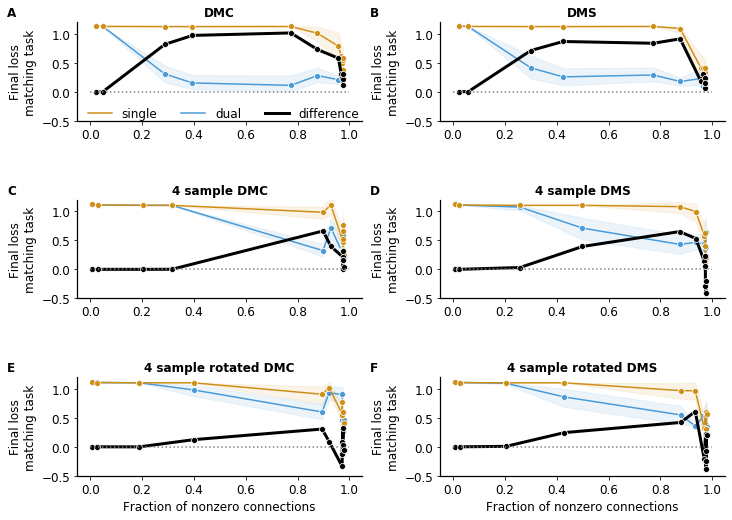

In [23]:
fig = plt.figure(constrained_layout=False, figsize=(9, 7))
gs_left = fig.add_gridspec(ncols=1, nrows=3, bottom=0.05, top=0.95, left=0, right=0.44, wspace=0.7, hspace=0.8)
gs_right = fig.add_gridspec(ncols=1, nrows=3, bottom=0.05, top=0.95, left=0.56, right=1, wspace=0.7, hspace=0.8)

ax_left, ax_right = {}, {}
for ii in range(3):
    ax_left[ii] = fig.add_subplot(gs_left[ii])
    ax_right[ii] = fig.add_subplot(gs_right[ii])
    
method = 'final_loss'    
save_fig = False
plot_nz_axis = True


for bool_diff in [False, True]:
    i_plot = 0
    for type_task in ['dmc', 'dmrc', 'dms', 'dmrs']:
        for nature_stim in ['onehot', 'periodic']:
            if nature_stim == 'onehot':
                if 'r' in type_task:
                    continue
            if i_plot < 3:
                curr_ax = ax_left[i_plot]
            else:
                curr_ax = ax_right[int(i_plot - 3)]

            if plot_nz_axis:
                nz_df, _, __ = ru.create_nonzero_mapping_df(type_task=type_task, nature_stim=nature_stim)
            else:
                nz_df = None
            df = prm.plot_learning_efficiency(plot_difference=bool_diff, method=method, 
                                            task_list=[type_task], nature_stim_list=[nature_stim], ax=curr_ax,
                                            plot_custom_legend=bool_diff if i_plot == 0 else False, 
                                            leg_anchor=(0, 0.25), leg_cols=3,
                                            new_x_axis_df=nz_df)
            if bool_diff:
                if 'c' in type_task:
                    str_dom = 'DMC'
                else:
                    str_dom = 'DMS'
                if 'r' in type_task:
                    str_task = 'rotated '
                else:
                    str_task = ''
                if nature_stim == 'onehot':
                    str_samp = ''
                else:
                    str_samp = '4 sample '
                # curr_ax.set_title(f'{str_task}, {str_samp},\n{str_dom}', loc='left', fontdict={'weight': 'bold'})
        
                curr_ax.set_title(f'{str_samp}{str_task}{str_dom}', fontdict={'weight': 'bold'})
            i_plot += 1

letters = ['A', 'B', 'C', 'D', 'E' ,'F']
i_let = 0
for ii in range(3):
    for axx in [ax_left, ax_right]:
        axx[ii].set_ylabel('Final loss\nmatching task')
        if ii < 2:
            axx[ii].set_xlabel('')
        axx[ii].set_ylim([-0.5, 1.2])
        axx[ii].plot([0, 1 if plot_nz_axis else 0.1], [0, 0], c='grey', linestyle=':')
        axx[ii].text(s=letters[i_let], x=-0.32 if plot_nz_axis else -4e-6, y=1.3, fontdict={'weight': 'bold'})
        i_let += 1
if save_fig:
    if method == 'final_loss':
        plt.savefig('figures/fig3_other-tasks.pdf', bbox_inches='tight')
    elif method == 'integral':
        plt.savefig('figures/fig3-supp_other-tasks__integral.pdf', bbox_inches='tight')

Cutting of DF because of empty rows
Cutting of DF because of empty rows
Cutting of DF because of empty rows
Cutting of DF because of empty rows
Cutting of DF because of empty rows
Cutting of DF because of empty rows
[4.70111328 4.46332621 7.55908912 7.52400027 9.16087792 7.90066323] [10.03439884  8.8820589   9.49832529  8.66621046  9.5977184   8.69025599]


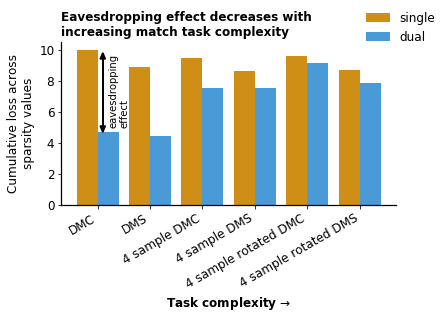

In [24]:
## Figure 4: (and was subsequently merged in inkscape)
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
prm.plot_bar_plot_all_tasks_splitup(ax=ax, save_fig=False)

Cutting of DF because of empty rows
Cutting of DF because of empty rows
Cutting of DF because of empty rows
Cutting of DF because of empty rows
Cutting of DF because of empty rows
Cutting of DF because of empty rows


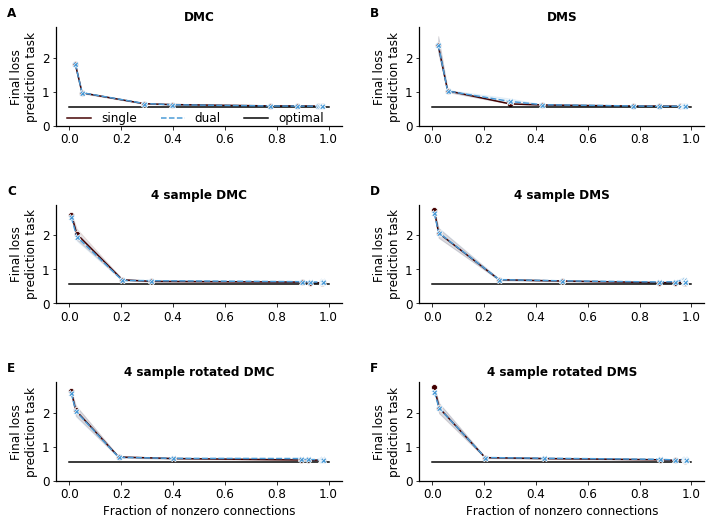

In [25]:
fig = plt.figure(constrained_layout=False, figsize=(9, 7))
gs_left = fig.add_gridspec(ncols=1, nrows=3, bottom=0.05, top=0.95, left=0, right=0.44, wspace=0.7, hspace=0.8)
gs_right = fig.add_gridspec(ncols=1, nrows=3, bottom=0.05, top=0.95, left=0.56, right=1, wspace=0.7, hspace=0.8)

ax_left, ax_right = {}, {}
for ii in range(3):
    ax_left[ii] = fig.add_subplot(gs_left[ii])
    ax_right[ii] = fig.add_subplot(gs_right[ii])
    
method = 'final_loss'    
save_fig = False
plot_nz_axis = True


i_plot = 0
for type_task in ['dmc', 'dmrc', 'dms', 'dmrs']:
    for nature_stim in ['onehot', 'periodic']:
        if nature_stim == 'onehot':
            if 'r' in type_task:
                continue
        if i_plot < 3:
            curr_ax = ax_left[i_plot]
        else:
            curr_ax = ax_right[int(i_plot - 3)]

        if plot_nz_axis:
            nz_df, _, __ = ru.create_nonzero_mapping_df(type_task=type_task, nature_stim=nature_stim)
        else:
            nz_df = None
        df = prm.plot_learning_efficiency(plot_difference=False, method=method, 
                                        task_list=[type_task], nature_stim_list=[nature_stim], ax=curr_ax,
                                        plot_custom_legend=bool_diff if i_plot == 0 else False, 
                                        leg_anchor=(0, 0.25), leg_cols=3,
                                        new_x_axis_df=nz_df, plot_pred_only=True)


        pred_only_colour = [67 / 255, 0, 0]
        pred_spec_colour = [73 / 255, 154 / 255, 215 / 255]
        for chi in list(curr_ax.get_children()):
            if hasattr(chi, '_color') and type(chi._color) != str:
                if np.isclose(np.array(chi._color), np.array(pred_spec_colour)).all():
                    chi.set_zorder(10)

        if 'c' in type_task:
            str_dom = 'DMC'
        else:
            str_dom = 'DMS'
        if 'r' in type_task:
            str_task = 'rotated '
        else:
            str_task = ''
        if nature_stim == 'onehot':
            optimal_pred = -0.25 * (3 * np.log(0.75) + np.log(0.25))
            curr_ax.plot([0, 1 if plot_nz_axis else 0.1], [optimal_pred, optimal_pred], c='k')
            str_samp = ''
        else:
            optimal_pred = 5 / 9
            curr_ax.plot([0, 1 if plot_nz_axis else 0.1], [optimal_pred, optimal_pred], c='k')
            str_samp = '4 sample '
        # curr_ax.set_title(f'{str_task}, {str_samp},\n{str_dom}', loc='left', fontdict={'weight': 'bold'})

        curr_ax.set_title(f'{str_samp}{str_task}{str_dom}', fontdict={'weight': 'bold'})
        i_plot += 1

letters = ['A', 'B', 'C', 'D', 'E' ,'F']
i_let = 0
for ii in range(3):
    for axx in [ax_left, ax_right]:
        axx[ii].set_ylabel('Final loss\nprediction task')
        if ii < 2:
            axx[ii].set_xlabel('')
        axx[ii].set_ylim([0, 2.9])
        axx[ii].text(s=letters[i_let], x=-0.24 if plot_nz_axis else -4e-6, y=3.2, fontdict={'weight': 'bold'})
        i_let += 1
if save_fig:
    plt.savefig('figures/fig3_other-tasks_predictionloss.pdf', bbox_inches='tight')
    

# Figure 3:
For this figure, decoders are trained to assess the strength of stimulus memory encoding. This takes a bit of time, so the first cell trains these decoders, saves results in a few dictionaries called `autotemp_dict` etc., which is used in the full figure generation.

20it [00:00, 867.23it/s]
20it [00:00, 1622.02it/s]
20it [00:00, 1448.36it/s]
0it [00:00, ?it/s]

RNN 1/20


3it [00:03,  1.17s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
13it [00:15,  1.20s/it]
0it [00:00, ?it/s]

RNN 2/20


13it [00:15,  1.19s/it]
0it [00:00, ?it/s]

RNN 3/20


4it [00:04,  1.16s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
5it [00:05,  1.19s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
10it [00:12,  1.22s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
13it [00:15,  1.21s/it]
0it [00:00, ?it/s]

RNN 4/20


8it [00:09,  1.20s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
9it [00:10,  1.20s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
10it [00:11,  1.21s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
11it [00:13,  1.22s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWar

RNN 5/20


2it [00:02,  1.14s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
13it [00:15,  1.20s/it]
0it [00:00, ?it/s]

RNN 6/20


13it [00:15,  1.17s/it]
0it [00:00, ?it/s]

RNN 7/20


13it [00:15,  1.20s/it]
0it [00:00, ?it/s]

RNN 8/20


12it [00:14,  1.20s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
13it [00:15,  1.19s/it]
0it [00:00, ?it/s]

RNN 9/20


6it [00:06,  1.17s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
7it [00:08,  1.18s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
8it [00:09,  1.19s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
13it [00:15,  1.19s/it]
0it [00:00, ?it/s]

RNN 10/20


10it [00:11,  1.20s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
13it [00:15,  1.19s/it]
0it [00:00, ?it/s]

RNN 11/20


13it [00:15,  1.17s/it]
0it [00:00, ?it/s]

RNN 12/20


9it [00:10,  1.19s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
12it [00:14,  1.21s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
13it [00:15,  1.19s/it]
0it [00:00, ?it/s]

RNN 13/20


12it [00:14,  1.20s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
13it [00:15,  1.19s/it]
0it [00:00, ?it/s]

RNN 14/20


12it [00:14,  1.23s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
13it [00:15,  1.21s/it]
0it [00:00, ?it/s]

RNN 15/20


12it [00:14,  1.19s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
13it [00:15,  1.19s/it]
0it [00:00, ?it/s]

RNN 16/20


13it [00:15,  1.18s/it]
0it [00:00, ?it/s]

RNN 17/20


12it [00:14,  1.22s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
13it [00:15,  1.20s/it]
0it [00:00, ?it/s]

RNN 18/20


5it [00:05,  1.17s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
13it [00:15,  1.20s/it]
0it [00:00, ?it/s]

RNN 19/20


4it [00:04,  1.16s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
8it [00:09,  1.18s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
9it [00:10,  1.21s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
10it [00:11,  1.25s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

RNN 20/20


13it [00:15,  1.21s/it]
13it [00:00, 490.09it/s]
0it [00:00, ?it/s]

s1
train labels  {'11': 200, '1x': 200, '22': 200, '2x': 200}


1it [00:01,  1.24s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
3it [00:03,  1.25s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
7it [00:08,  1.20s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
8it [00:09,  1.21s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarni

s2
train labels  {'11': 200, '1x': 200, '22': 200, '2x': 200}


2it [00:02,  1.16s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
5it [00:06,  1.19s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
10it [00:11,  1.18s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
11it [00:13,  1.20s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWar

go
train labels  {'11': 200, '1x': 200, '22': 200, '2x': 200}


/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
5it [00:05,  1.16s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
9it [00:10,  1.20s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
10it [00:11,  1.21s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
11it [00:13,  1.2

RNN 1/20


13it [00:15,  1.16s/it]
0it [00:00, ?it/s]

RNN 2/20


13it [00:14,  1.14s/it]
0it [00:00, ?it/s]

RNN 3/20


13it [00:14,  1.15s/it]
0it [00:00, ?it/s]

RNN 4/20


13it [00:15,  1.17s/it]
0it [00:00, ?it/s]

RNN 5/20


13it [00:15,  1.17s/it]
0it [00:00, ?it/s]

RNN 6/20


13it [00:15,  1.16s/it]
0it [00:00, ?it/s]

RNN 7/20


13it [00:15,  1.17s/it]
0it [00:00, ?it/s]

RNN 8/20


13it [00:14,  1.15s/it]
0it [00:00, ?it/s]

RNN 9/20


13it [00:15,  1.16s/it]
0it [00:00, ?it/s]

RNN 10/20


13it [00:15,  1.16s/it]
0it [00:00, ?it/s]

RNN 11/20


13it [00:15,  1.16s/it]
0it [00:00, ?it/s]

RNN 12/20


13it [00:15,  1.16s/it]
0it [00:00, ?it/s]

RNN 13/20


13it [00:14,  1.15s/it]
0it [00:00, ?it/s]

RNN 14/20


13it [00:15,  1.16s/it]
0it [00:00, ?it/s]

RNN 15/20


12it [00:13,  1.14s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
13it [00:15,  1.16s/it]
0it [00:00, ?it/s]

RNN 16/20


13it [00:15,  1.16s/it]
0it [00:00, ?it/s]

RNN 17/20


13it [00:15,  1.16s/it]
0it [00:00, ?it/s]

RNN 18/20


13it [00:15,  1.16s/it]
0it [00:00, ?it/s]

RNN 19/20


13it [00:14,  1.15s/it]
0it [00:00, ?it/s]

RNN 20/20


13it [00:14,  1.15s/it]
13it [00:00, 539.73it/s]
0it [00:00, ?it/s]

s1
train labels  {'11': 200, '1x': 200, '22': 200, '2x': 200}


1it [00:01,  1.13s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
3it [00:03,  1.15s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
4it [00:04,  1.16s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
5it [00:05,  1.18s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarni

s2
train labels  {'11': 200, '1x': 200, '22': 200, '2x': 200}


2it [00:02,  1.17s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
3it [00:03,  1.19s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
4it [00:04,  1.19s/it]/home/tplas/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
5it [00:06,  1.20s

go
train labels  {'11': 200, '1x': 200, '22': 200, '2x': 200}


20it [00:22,  1.13s/it]


AssertionError: the code below will make the same plot, it is just there to show how to avoid redoing the computations

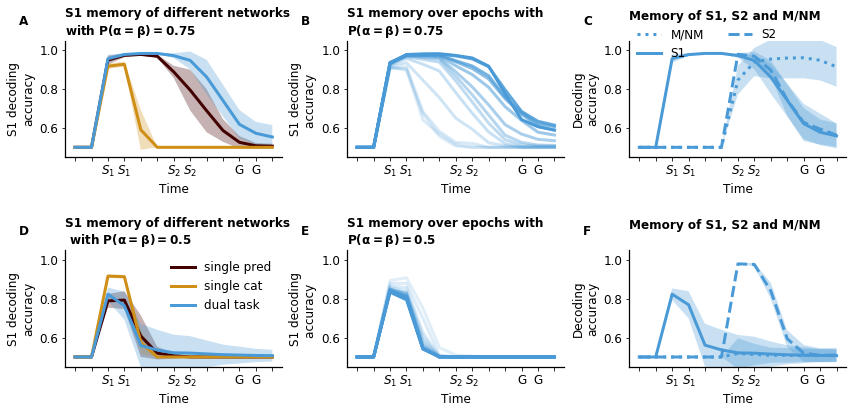

In [30]:
## Instructions on saving the values to make this plot:

## The FIRST RUN, compute everything:

fig, ax = plt.subplots(2, 3, figsize=(14, 6), gridspec_kw={'hspace': 0.8, 'wspace': 0.3})
prm.plot_autotemp_s1_decoding('/home/tplas/repos/eavesdropping/models/7525/dmc_task/onehot/sparsity_1e-03/', ax=ax[0][0], plot_legend=False)

## Set dict to None:
autotemp_dict = prm.plot_autotemp_s1_different_epochs(ax=ax[0][1], plot_legend=False,
                                                      autotemp_dec_mat_dict=None,
                                                     rnn_folder='/home/tplas/repos/eavesdropping/models/save_state/7525/dmc_task/onehot/sparsity_1e-03/pred_dmc/')
## Set reset to True, skip to False:
prm.plot_autotemp_all_reps_decoding(reset_decoders=True, ax=ax[0][2],
                                    skip_if_already_decoded=False,
                                    rnn_folder='/home/tplas/repos/eavesdropping/models/7525/dmc_task/onehot/sparsity_1e-03/pred_dmc/')

prm.plot_autotemp_s1_decoding('/home/tplas/repos/eavesdropping/models/5050/dmc_task/onehot/sparsity_1e-03/', ax=ax[1][0], plot_legend=True)
autotemp_dict_50 = prm.plot_autotemp_s1_different_epochs(ax=ax[1][1], plot_legend=False, 
                                                         autotemp_dec_mat_dict=None,
                                                        rnn_folder='/home/tplas/repos/eavesdropping/models/save_state/5050/dmc_task/onehot/sparsity_1e-03/pred_dmc/')



prm.plot_autotemp_all_reps_decoding(reset_decoders=True, ax=ax[1][2],
                                    skip_if_already_decoded=False, plot_legend=False,
                                    rnn_folder='/home/tplas/repos/eavesdropping/models/5050/dmc_task/onehot/sparsity_1e-03/pred_dmc/')


ax[0][0].set_title('S1 memory of different networks\nwith ' + r'$\mathbf{P(\alpha = \beta)=0.75}$', loc='left', fontdict={'weight': 'bold'})
ax[1][0].set_title('S1 memory of different networks\n with ' + r'$\mathbf{P(\alpha = \beta)=0.5}$', loc='left', fontdict={'weight': 'bold'})
ax[0][1].set_title('S1 memory over epochs with\n' + r'$\mathbf{P(\alpha = \beta)=0.75}$', loc='left', fontdict={'weight': 'bold'})
ax[1][1].set_title('S1 memory over epochs with\n' + r'$\mathbf{P(\alpha = \beta)=0.5}$', loc='left', fontdict={'weight': 'bold'});
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
i_let = 0
for i_row in range(2):
    for i_col in range(3):
        ax[i_row][i_col].text(s=letters[i_let], x=-3.4, y=1.13, fontdict={'weight': 'bold'})
        i_let += 1
        
assert False, 'the code below will make the same plot, it is just there to show how to avoid redoing the computations'
## The SECOND run, reuse existing:

## Reuse dict:
autotemp_dict = prm.plot_autotemp_s1_different_epochs(ax=ax[0][1], plot_legend=False,
                                                      autotemp_dec_mat_dict=autotemp_dict,
                                                     rnn_folder='/home/tplas/repos/eavesdropping/models/save_state/7525/dmc_task/onehot/sparsity_1e-03/pred_dmc/')
## Reset to False ,skip to True:
prm.plot_autotemp_all_reps_decoding(reset_decoders=False, ax=ax[0][2],
                                    skip_if_already_decoded=True,
                                    rnn_folder='/home/tplas/repos/eavesdropping/models/7525/dmc_task/onehot/sparsity_1e-03/pred_dmc/')
prm.plot_autotemp_s1_decoding('/home/tplas/repos/eavesdropping/models/5050/dmc_task/onehot/sparsity_1e-03/', ax=ax[1][0], plot_legend=True)
autotemp_dict_50 = prm.plot_autotemp_s1_different_epochs(ax=ax[1][1], plot_legend=False, 
                                                         autotemp_dec_mat_dict=autotemp_dict_50,
                                                        rnn_folder='/home/tplas/repos/eavesdropping/models/save_state/5050/dmc_task/onehot/sparsity_1e-03/pred_dmc/')
prm.plot_autotemp_all_reps_decoding(reset_decoders=False, ax=ax[1][2],
                                    skip_if_already_decoded=True, plot_legend=False,
                                    rnn_folder='/home/tplas/repos/eavesdropping/models/5050/dmc_task/onehot/sparsity_1e-03/pred_dmc/')


20it [00:00, 1924.13it/s]
20it [00:00, 2178.63it/s]
20it [00:00, 1409.64it/s]
13it [00:00, 1143.80it/s]
20it [00:00, 835.41it/s]
20it [00:00, 730.51it/s]
20it [00:00, 658.37it/s]
20it [00:00, 1782.72it/s]
0it [00:00, ?it/s]

s1
s2
go


20it [00:00, 850.03it/s]
20it [00:00, 1095.69it/s]
13it [00:00, 1131.24it/s]
20it [00:00, 1378.96it/s]
20it [00:00, 685.14it/s]
20it [00:00, 1180.78it/s]


s1
s2
go


0it [00:00, ?it/s]

20


20it [00:21,  1.08s/it]


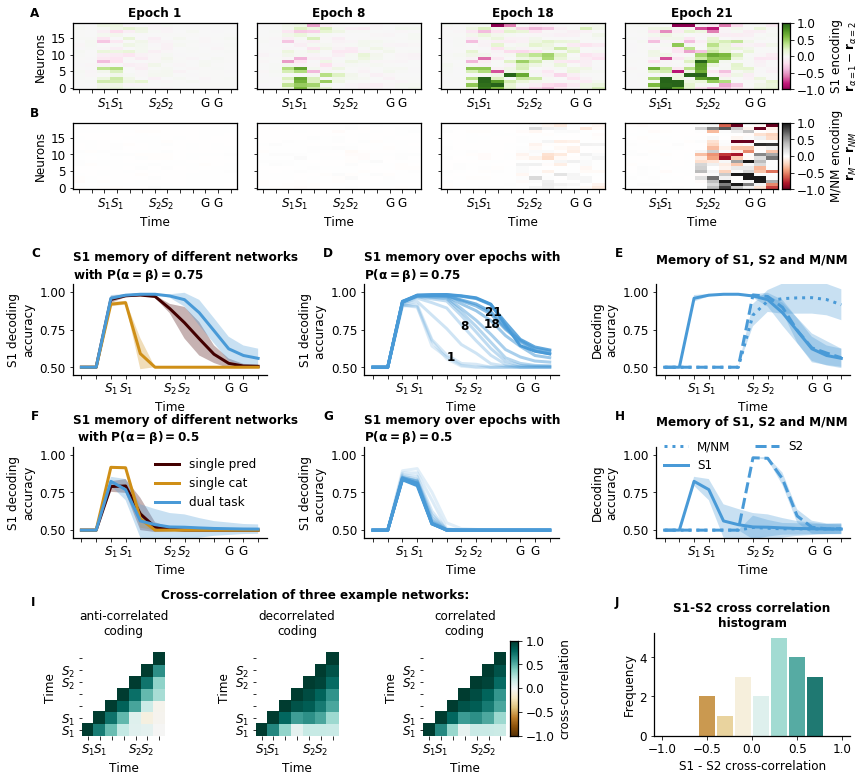

In [32]:
fig = plt.figure(constrained_layout=False, figsize=(12, 11))

epoch_list = [1, 8, 18, 21]
save_fig = False

gs_mat = fig.add_gridspec(ncols=len(epoch_list), nrows=2, bottom=0.74, top=0.95, left=0.05, right=0.88, wspace=0.12, hspace=0.5)
# gs_cbar_mat = fig.add_gridspec(ncols=1, nrows=2, bottom=0.8, top=0.95, left=0.95, right=0.99, wspace=0.0, hspace=0.3)
gs_mem = fig.add_gridspec(ncols=3, nrows=2, bottom=0.3, top=0.62, left=0.05, right=0.95, wspace=0.5, hspace=0.8)
gs_code_mat = fig.add_gridspec(ncols=3, nrows=1, bottom=0.05, top=0.17, left=0.05, right=0.57, wspace=0.7, hspace=0.3)
gs_code_hist = fig.add_gridspec(ncols=1, nrows=1, bottom=0.05, top=0.18, left=0.723, right=0.95, wspace=0.3, hspace=0.3)

ax_mat = {0: {}, 1: {}}
ax_mem = {0: {}, 1: {}}
ax_code_mat = {}
ax_cbar = {}
for i_row in range(2):
#     ax_cbar[i_row] = fig.add_subplot(gs_cbar_mat[i_row])
    for i_col in range(len(epoch_list)):
        ax_mat[i_row][i_col] = fig.add_subplot(gs_mat[i_row, i_col])
    for i_col in range(3):
        ax_mem[i_row][i_col] = fig.add_subplot(gs_mem[i_row, i_col])
for i_col in range(3):
    ax_code_mat[i_col] = fig.add_subplot(gs_code_mat[i_col])
ax_code_hist = fig.add_subplot(gs_code_hist[0])
## Example rasters:
rnn = ru.load_rnn('/home/tplas/repos/eavesdropping/models/save_state/7525/dmc_task/onehot/sparsity_1e-03/pred_dmc/rnn-mnm_2021-05-13-2134.data')
rnn.eval()

## Determine sorting using final solution:
_, __, forw  = bpm.train_single_decoder_new_data(rnn=rnn, ratio_expected=0.5,
                                         sparsity_c=0.1, bool_train_decoder=False)  # just gets data without training decoder
plot_diff, _, __ = ru.calculate_diff_activity(forw=forw, representation='s1')
ol = prm.opt_leaf(plot_diff, dim=0)  # optimal leaf sorting

for i_epoch, epoch in enumerate(epoch_list):
    rnn.load_state_dict(rnn.saved_states_dict[epoch])
    rnn.eval()
    _, __, forw  = bpm.train_single_decoder_new_data(rnn=rnn, ratio_expected=0.5,
                                                 sparsity_c=0.1, bool_train_decoder=False)  # just gets data without training decoder
    for ii, rep in enumerate(['s1', 'go']):
        plot_diff, _, __ = ru.calculate_diff_activity(forw=forw, representation=rep)
        ol = prm.plot_raster_trial_average(plot_diff=plot_diff, ol=ol, ax=ax_mat[ii][i_epoch], representation=rep,
                                           th=1, plot_title=False, c_bar=False)
    
#         ax_mat[i_epoch + 1][ii].set_title(f'Epoch {epoch}, rep {rep}', y=0.75)
        if ii == 1:
            ax_mat[ii][i_epoch].set_xlabel('Time')
        else:
            ax_mat[ii][i_epoch].set_title(f'Epoch {epoch}', fontdict={'weight': 'bold'})
            ax_mat[ii][i_epoch].set_xlabel('')
        if i_epoch == 0:
            ax_mat[ii][i_epoch].set_ylabel('Neurons')
        else:
            ax_mat[ii][i_epoch].set_ylabel('')
            ax_mat[ii][i_epoch].set_yticklabels([])
        for xx in ['top', 'right', 'bottom', 'left']:
            ax_mat[ii][i_epoch].spines[xx].set_visible(True)
            
for ii, rep in enumerate(['s1', 'go']):
    divider = make_axes_locatable(ax_mat[ii][i_epoch])
    ax_cbar[ii] = divider.append_axes('right', size='5%', pad=0.05)
    mpl_colorbar(ax_mat[ii][i_epoch].get_children()[0], cax=ax_cbar[ii])
    ax_cbar[ii].yaxis.set_ticks([-1, -0.5, 0, 0.5, 1])
    ax_cbar[ii].yaxis.set_ticks_position('right')
ax_cbar[0].set_ylabel('S1 encoding\n' + r'$\mathbf{r}_{\alpha=1} - \mathbf{r}_{\alpha=2}$')
ax_cbar[1].set_ylabel('M/NM encoding\n' + r'$\mathbf{r}_{M} - \mathbf{r}_{NM}$')


        
## Memory mechanisms:
prm.plot_autotemp_s1_decoding('/home/tplas/repos/eavesdropping/models/7525/dmc_task/onehot/sparsity_1e-03/', ax=ax_mem[0][0], plot_legend=False)
autotemp_dict = prm.plot_autotemp_s1_different_epochs(ax=ax_mem[0][1], plot_legend=False,
                                                      autotemp_dec_mat_dict=autotemp_dict,
                                                      add_labels=True,
                                                      epoch_list=[1, 2, 4, 6, 8, 10, 12, 15, 18, 20, 21, 25, 40],
                                                     rnn_folder='/home/tplas/repos/eavesdropping/models/save_state/7525/dmc_task/onehot/sparsity_1e-03/pred_dmc/')
prm.plot_autotemp_all_reps_decoding(reset_decoders=False, ax=ax_mem[0][2],
                                    skip_if_already_decoded=True, plot_legend=False,
                                    rnn_folder='/home/tplas/repos/eavesdropping/models/7525/dmc_task/onehot/sparsity_1e-03/pred_dmc/')

prm.plot_autotemp_s1_decoding('/home/tplas/repos/eavesdropping/models/5050/dmc_task/onehot/sparsity_1e-03/', ax=ax_mem[1][0], plot_legend=True)
autotemp_dict_50 = prm.plot_autotemp_s1_different_epochs(ax=ax_mem[1][1], plot_legend=False, 
                                                         autotemp_dec_mat_dict=autotemp_dict_50,
                                                        rnn_folder='/home/tplas/repos/eavesdropping/models/save_state/5050/dmc_task/onehot/sparsity_1e-03/pred_dmc/')



prm.plot_autotemp_all_reps_decoding(reset_decoders=False, ax=ax_mem[1][2],
                                    skip_if_already_decoded=True, plot_legend=True,
                                    rnn_folder='/home/tplas/repos/eavesdropping/models/5050/dmc_task/onehot/sparsity_1e-03/pred_dmc/')


ax_mem[0][0].set_title('S1 memory of different networks\nwith ' + r'$\mathbf{P(\alpha = \beta)=0.75}$', loc='left', fontdict={'weight': 'bold'})
ax_mem[1][0].set_title('S1 memory of different networks\n with ' + r'$\mathbf{P(\alpha = \beta)=0.5}$', loc='left', fontdict={'weight': 'bold'})
ax_mem[0][1].set_title('S1 memory over epochs with\n' + r'$\mathbf{P(\alpha = \beta)=0.75}$', loc='left', fontdict={'weight': 'bold'})
ax_mem[1][1].set_title('S1 memory over epochs with\n' + r'$\mathbf{P(\alpha = \beta)=0.5}$', loc='left', fontdict={'weight': 'bold'});


## Neural code matrices 
irnn_mat_list = [3, 18, 2]
rnn_folder = '/home/tplas/repos/eavesdropping/models/7525/dmc_task/onehot/sparsity_1e-03/pred_dmc/'
rnn_list = ru.get_list_rnns(rnn_folder=rnn_folder)

code_mat_titles = ['anti-correlated\ncoding', 'decorrelated\ncoding', 'correlated\ncoding']
for i_plot, i_rnn in enumerate(irnn_mat_list):
    rnn = ru.load_rnn(os.path.join(rnn_folder, rnn_list[i_rnn]))
    rnn.eval()
    prm.plot_correlation_matrix(rnn=rnn, representation='s1', ax=ax_code_mat[i_plot],
                               plot_cbar=False)
    ax_code_mat[i_plot].set_title(code_mat_titles[i_plot])#, fontdict={'weight': 'bold'})

divider = make_axes_locatable(ax_code_mat[i_plot])
ax_cbar_code = divider.append_axes('right', size='10%', pad=0.05)
mpl_colorbar(ax_code_mat[i_plot].get_children()[0], cax=ax_cbar_code)
ax_cbar_code.yaxis.set_ticks([-1, -0.5, 0, 0.5, 1])
ax_cbar_code.yaxis.set_ticks_position('right')
ax_cbar_code.set_ylabel('cross-correlation')

ax_code_mat[1].text(s='Cross-correlation of three example networks:', x=5, y=11.5, fontdict={'weight': 'bold', 'ha': 'center'})

prm.plot_hist_rot_indices(rnn_folder=rnn_folder, ax=ax_code_hist)
ax_code_hist.set_title('S1-S2 cross correlation\nhistogram', fontdict={'weight': 'bold'})
    
letters = ['C', 'D', 'E', 'F', 'G', 'H']
i_let = 0
for i_row in range(2):
    for i_col in range(3):
        ax_mem[i_row][i_col].text(s=letters[i_let], x=-3.4, y=1.23, fontdict={'weight': 'bold'})
        i_let += 1
ax_mem[1][0].text(s='I', x=-3.4, y=0, fontdict={'weight': 'bold'})
ax_mem[1][2].text(s='J', x=-3.4, y=0, fontdict={'weight': 'bold'})
ax_mat[0][0].text(s='A', x=-3.4, y=21.8, fontdict={'weight': 'bold'})
ax_mat[1][0].text(s='B', x=-3.4, y=21.8, fontdict={'weight': 'bold'})

if save_fig:
    plt.savefig('figures/fig4_mechanisms_v2.pdf', bbox_inches='tight')

# Figure 5:

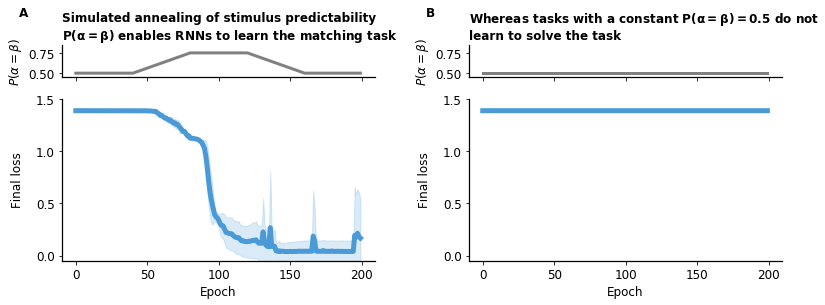

In [33]:
save_fig = False 

_ = prm.plot_sa_convergence(plot_indiv=False, 
                        sa_folder_list=['/home/tplas/repos/eavesdropping/models/simulated_annealing/7525/dmc_task/onehot/sparsity_1e-03/pred_dmc', 
                                        '/home/tplas/repos/eavesdropping/models/simulated_annealing/5050/dmc_task/onehot/sparsity_1e-03/pred_dmc'])

if save_fig:
    plt.savefig('figures/fig5-simulated-annealing.pdf', bbox_inches='tight')

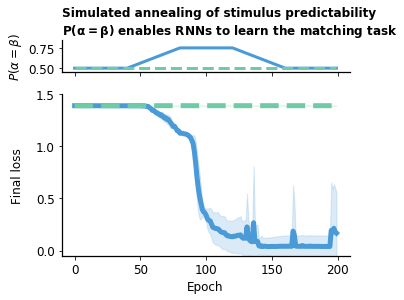

In [35]:
save_fig = False 

_ = prm.plot_sa_convergence_small(plot_indiv=False, 
                                sa_folder_list=['/home/tplas/repos/eavesdropping/models/simulated_annealing/7525/dmc_task/onehot/sparsity_1e-03/pred_dmc', 
                                                '/home/tplas/repos/eavesdropping/models/simulated_annealing/5050/dmc_task/onehot/sparsity_1e-03/pred_dmc'])

if save_fig:
    plt.savefig('figures/fig3-simulated-annealing.svg', bbox_inches='tight')